# 🧫 ANÁLISIS EXPLORATORIO DE LOS DATOS (EDA, Expploratory Data Analyis)

## E_peak, Beta, Beta_rel, Sigma_d 🔭

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Definir nombres de las columnas
columnas = ['E_peak', 'beta', 'sigma', 'beta_Rel', 'astro_DM']

# Cargar los datos
df = pd.read_csv('XY_bal_log_Rel.txt', sep="\s+", names=columnas, engine='python', skiprows=1)

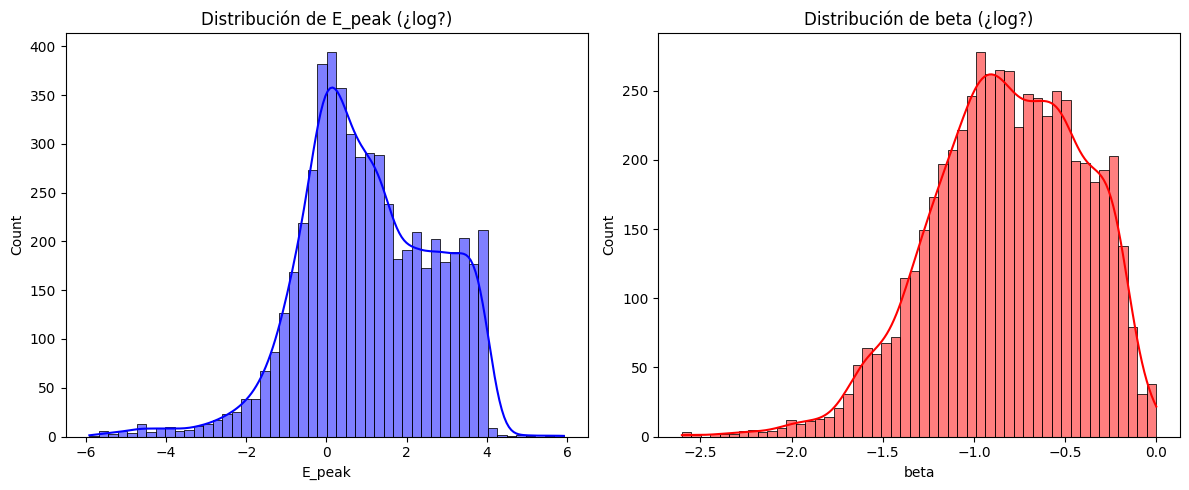

In [5]:
# Convertir columnas a numéricas
for col in ['E_peak', 'beta']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Graficar histogramas de E_peak y beta para ver su distribución
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['E_peak'], bins=50, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución de E_peak (¿log?)')

sns.histplot(df['beta'], bins=50, kde=True, ax=axes[1], color='red')
axes[1].set_title('Distribución de beta (¿log?)')

plt.tight_layout()
plt.show()

In [6]:
# Ver los primeros valores para verificar la estructura
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
     E_peak      beta     sigma  beta_Rel  astro_DM
0 -0.412502 -1.325139  1.356951 -0.122193       0.0
1  0.708140 -0.000174  0.623167 -1.601886       0.0
2  0.224740 -0.581202  1.010041 -0.311249       0.0
3  0.257319 -0.561933  0.615413 -0.038913       0.0
4  0.326110 -1.100179  1.624932 -0.528753       0.0


In [7]:
# Muestra aleatoria de 5 filas
df.sample(5)

,E_peak,beta,sigma,beta_Rel,astro_DM
2869,0.948560,-0.867420,0.886378,-0.353128,1.0
2856,3.166430,-1.203148,1.325516,0.578263,1.0
3831,0.191730,-0.297397,0.721728,0.234413,1.0
4224,3.809425,-0.929224,0.982316,0.677644,1.0
1524,-1.551990,-1.224026,1.359621,-0.231906,0.0


In [8]:
# Ver estadísticas generales (valores mínimos, máximos, media, desviación estandar, etc.)
print("Estadísticas descriptivas:")
df.describe()

Estadísticas descriptivas:


,E_peak,beta,sigma,beta_Rel,astro_DM
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,1.018241,-0.819062,1.061131,-0.061574,0.500000
std,1.667957,0.413740,0.357026,0.478845,0.500044
min,-5.912006,-2.602060,0.608098,-3.198657,0.000000
25%,-0.086760,-1.093827,0.778414,-0.301915,0.000000
50%,0.883369,-0.805070,0.973677,-0.045029,0.500000
75%,2.302818,-0.502967,1.254676,0.287035,1.000000
max,5.918502,0.000000,2.899104,1.866966,1.000000


In [9]:
# Ver los valores de correlación entre variables
print("Matriz de correlación entre variables:")
df.corr()

Matriz de correlación entre variables:


,E_peak,beta,sigma,beta_Rel,astro_DM
E_peak,1.000000,0.108252,-0.116761,0.355409,0.662491
beta,0.108252,1.000000,-0.106935,-0.294714,0.280305
sigma,-0.116761,-0.106935,1.000000,-0.347368,-0.143709
beta_Rel,0.355409,-0.294714,-0.347368,1.000000,0.329702
astro_DM,0.662491,0.280305,-0.143709,0.329702,1.000000


# 📊 Gráficas

## 📌 Histogramas individuales de cada feature

<Figure size 1200x800 with 0 Axes>

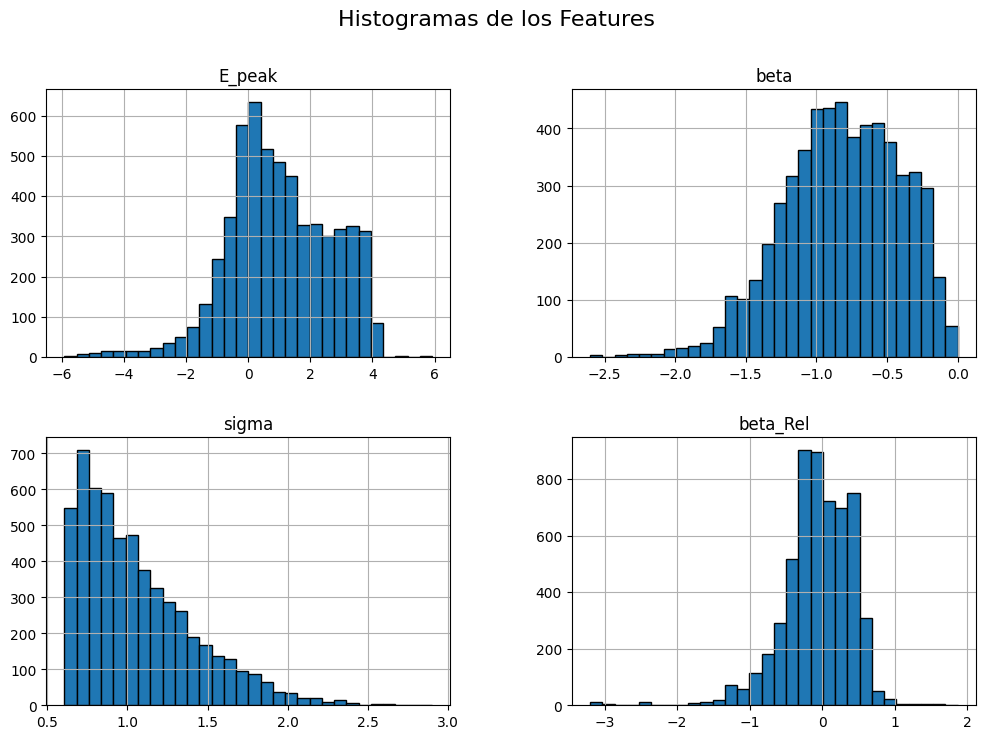

In [10]:
# Configurar tamaño de gráficos
plt.figure(figsize=(12,8))

# Graficar histogramas para todas las variables excepto 'astro_DM'
df.drop(columns=['astro_DM']).hist(figsize=(12,8), bins=30, edgecolor='black')

plt.suptitle('Histogramas de los Features', fontsize=16)
plt.show()

## 📌 Matriz de correlación

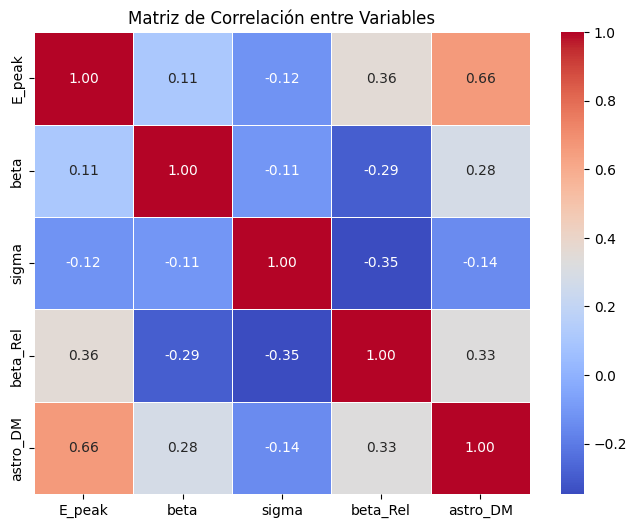

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

## 📌 Pairplot (gráfica de pares)

Permite visualizar la relación entre cada par de features.
Muestra cómo se separan las clases (astro_DM) en diferentes combinaciones de variables.

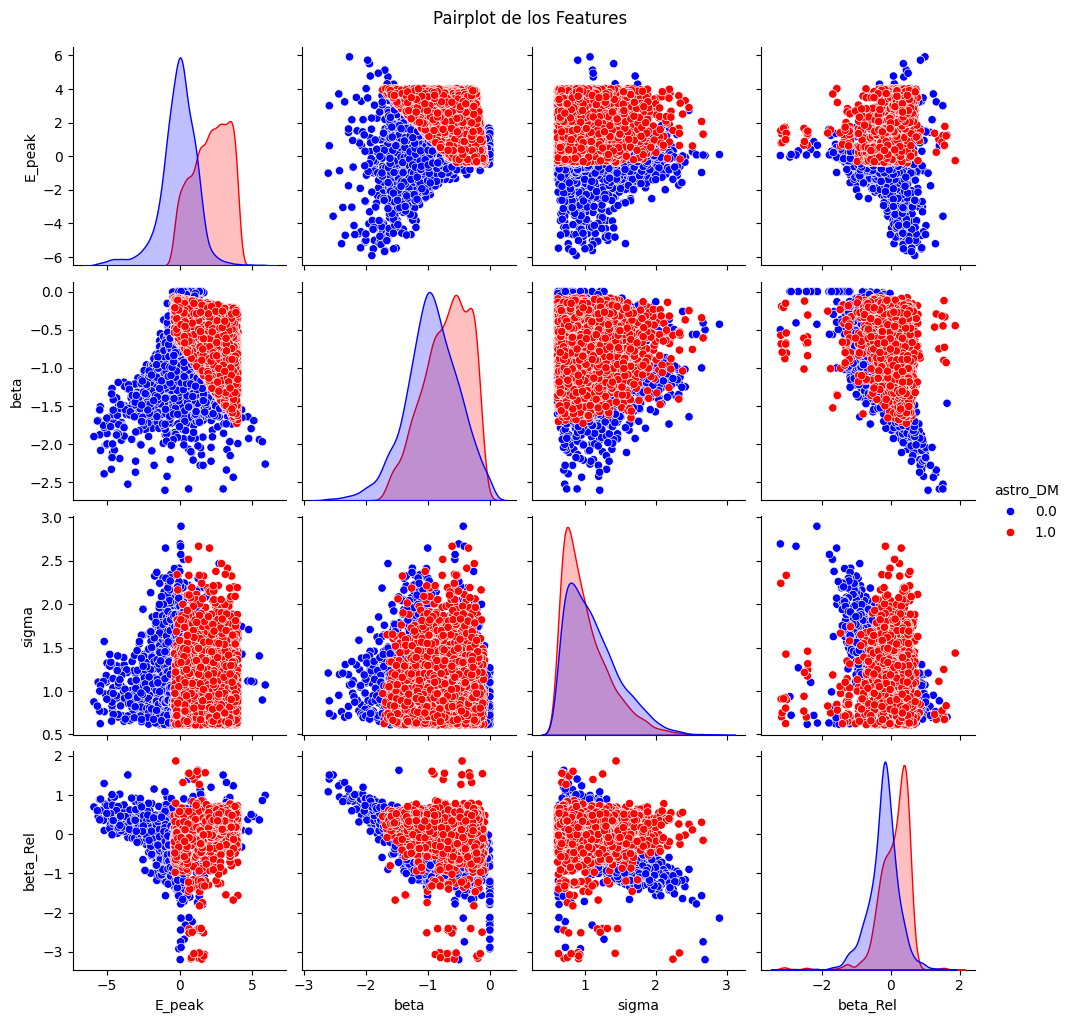

In [12]:
sns.pairplot(df, hue="astro_DM", diag_kind='kde', palette=['blue', 'red'])
plt.suptitle('Pairplot de los Features', y=1.02)
plt.show()

## 📌 Scatter plot: E_peak vs beta (Beta-plot)

Permite ver cómo se distribuyen las clases astro_DM en este espacio.
Si hay buena separación, indica que estas features son útiles para la clasificación.

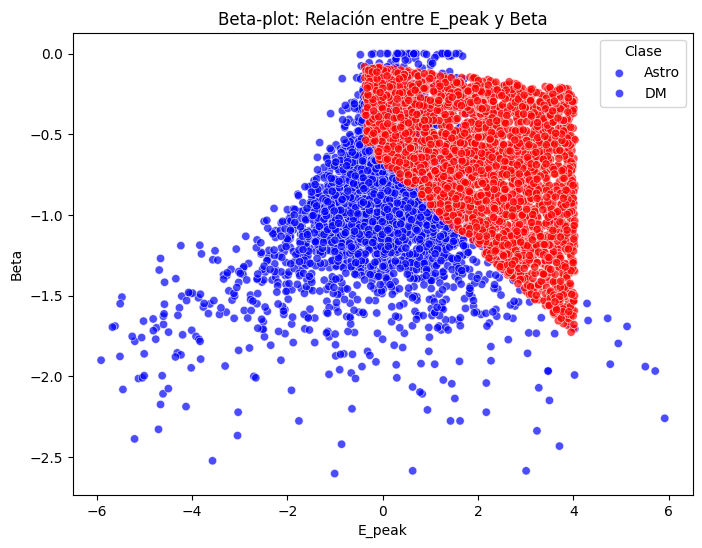

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='E_peak', y='beta', hue='astro_DM', alpha=0.7, palette=['blue', 'red'])
plt.xlabel('E_peak')
plt.ylabel('Beta')
plt.title('Beta-plot: Relación entre E_peak y Beta')
plt.legend(title="Clase", labels=["Astro", "DM"])
plt.show()

## 📌 Scatter plot: beta_Rel vs sigma

Permite ver si hay relación entre la incertidumbre espectral y la significación de detección.
Podría ayudar a identificar fuentes con detecciones débiles o anomalías.

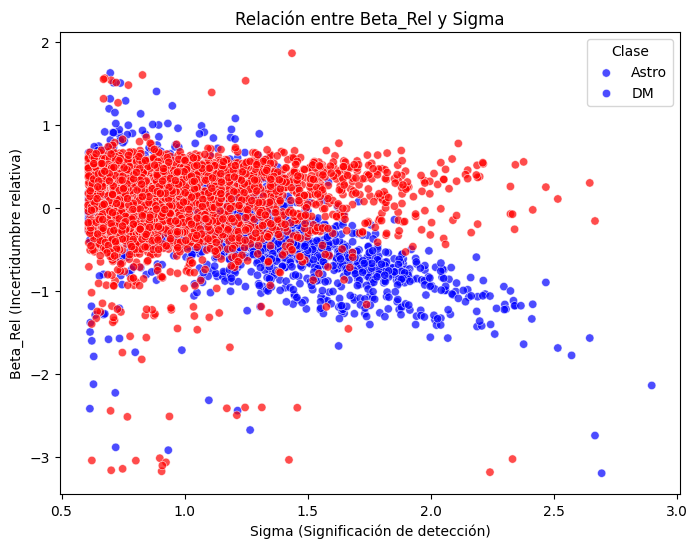

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sigma', y='beta_Rel', hue='astro_DM', alpha=0.7, palette=['blue', 'red'])
plt.xlabel('Sigma (Significación de detección)')
plt.ylabel('Beta_Rel (Incertidumbre relativa)')
plt.title('Relación entre Beta_Rel y Sigma')
plt.legend(title="Clase", labels=["Astro", "DM"])
plt.show()

## 📌 Boxplots para identificar valores atípicos

Ayuda a detectar outliers en cada feature.
Puede indicar si algunos valores extremos afectan la clasificación.

<Figure size 1200x800 with 0 Axes>

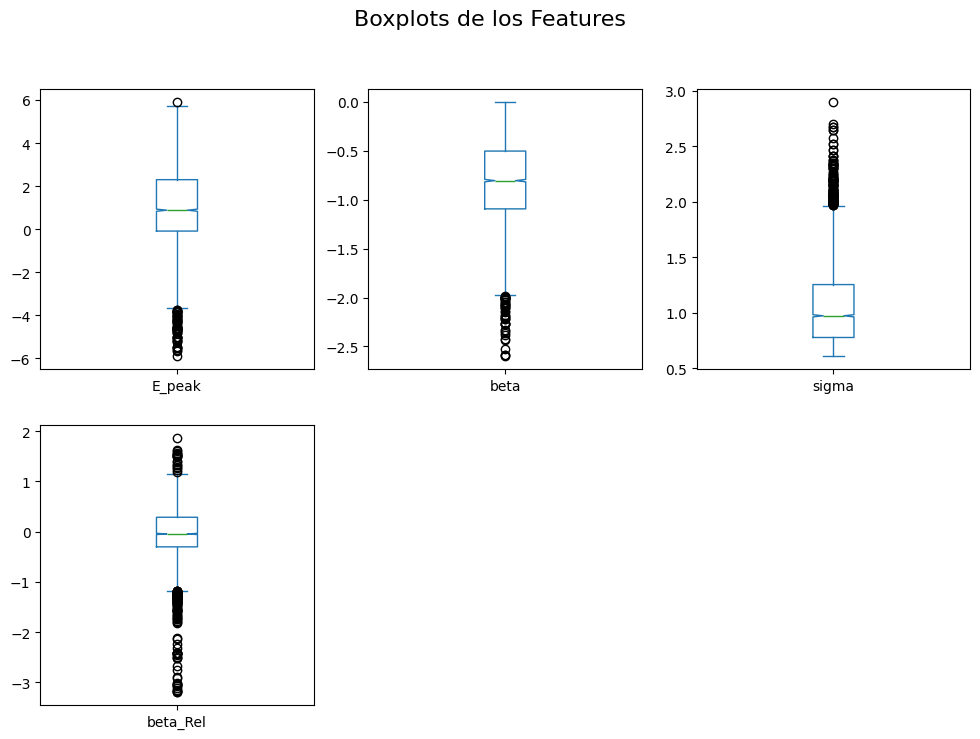

In [15]:
plt.figure(figsize=(12,8))

# Graficar boxplots para todas las variables excepto 'astro_DM'
df.drop(columns=['astro_DM']).plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8), notch=True)

plt.suptitle('Boxplots de los Features', fontsize=16)
plt.show()